# Simulación de números aleatorios
## Funciones de variables aleatorias
Sabemos que si $X$ está distribuida exponencial con parámetro $\lambda$ y $Y=g(X)$, con $g(x)=e^x$, entonces $Y$ está distribuida Pareto con parámetro $\lambda$. Es decir, si $$f_X(x)=\lambda e^{-\lambda x}1_{[0,\infty)}(x)$$ y $Y=e^X$, entonces $$f_Y(y)=\frac{\lambda}{y^{\lambda+1}}1_{[1,\infty)}(y).$$

Comprobamos esto mediante simulaciones, generando números aleatorios exponenciales, aplicándole a cada número aleatorio la función exponencial, y viendo su histograma.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

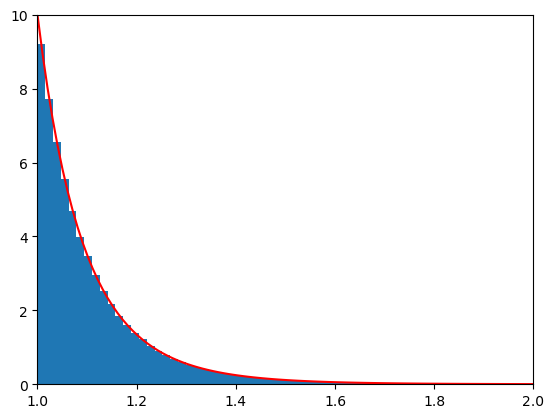

In [ ]:
lamb=10
vsexps=sts.expon.rvs(scale=1/lamb,size=1000000)
vspar=np.exp(vsexps)
plt.hist(vspar,bins=200,density=True)
yvals=np.linspace(1,2,100)
plt.plot(yvals,lamb/np.power(yvals,lamb+1),'r')
plt.xlim((1,2))
plt.ylim((0,10))
plt.show()

## Generación de números aleatorios continuos con la función de distribución inversa
Sea $X$ una variable aleatoria con densidad $$f_X(x)=\frac{x}{2}1_{[0,2]}(x).$$ Entonces, su función de distribución acumulada está dada por $$F_X(z)=P[X\leq z]=\begin{cases}0, & z\leq 0 \\ \frac{z^2}{4}, & 0<z\leq 2\\ 1, & z>2\end{cases}.$$ Por lo tanto, la inversa de la función de distribución acumulada es $$F^{-1}_X(z)=2\sqrt{z}, \ z\in[0,1].$$ Generamos entonces números aleatorios uniformes en $[0,1]$, les aplicamos la función de distribución acumulada inversa, y revisamos que su histograma concuerda con la densidad de la variable aleatoria $X$.

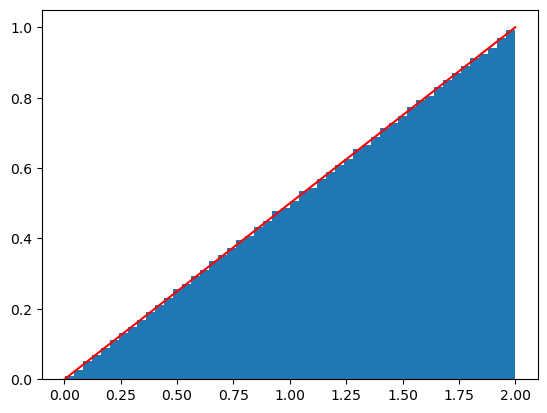

In [ ]:
us1=np.random.uniform(size=1000000)
invrvs=2*np.sqrt(us1)
plt.hist(invrvs,bins=50,density=True)
xvals=np.linspace(0,2,100)
plt.plot(xvals,xvals/2,'r')
plt.show()

## Generación de números aleatorios discretos con la función de distribución acumulada
Supongamos que tengo una variable aleatoria discreta $X$ que puede tomar valores en el conjunto ${1,2,3,4,5,6}$, y su función de probabilidad puntual está dada por $$p_X(k)=\frac{e^{\cos\left(\frac{\pi}{3}k\right)}}{2\cosh(1)+4\cosh\left(\frac{1}{2}\right)}.$$ Primero, calculamos su función de distribución acumulada, que es $$F_X(n)=\sum_{k=1}^np_X(k).$$ Después, generamos números aleatorios uniformes $U$ y vemos en que escalón pega; es decir, vemos el primer número natural $n$ tal que $U<F_X(n)$, y guardamos ese valor $n$. Finalmente, hacemos un histograma con todos los valores $n$ guardados, y comparamos con la función de probabilidad puntual.

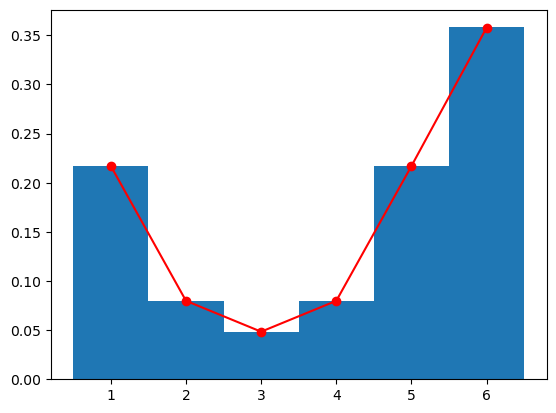

In [ ]:
us2=np.random.uniform(size=1000000)
pmf=np.exp(np.cos((np.pi/3)*np.arange(1,7,1)))/(2*np.cosh(1)+4*np.cosh(1/2))
cdf=np.zeros(len(pmf))
cdf[0]=pmf[0]
for j in range(1,6):
    cdf[j]=cdf[j-1]+pmf[j]
xrvs=np.zeros(len(us2))
for j in range(len(xrvs)):
    idx=1
    while us2[j]>cdf[idx-1]:
        idx+=1
    xrvs[j]=idx
hdisc=np.zeros(6)
for j in range(len(xrvs)):
    hdisc[int(xrvs[j]-1)]+=1/1000000
plt.bar(np.arange(1,7,1),hdisc,width=1)
plt.plot(np.arange(1,7,1),pmf, 'ro-')
plt.show()

## Generación de números aleatorios con el algoritmo de Metropolis-Hastings
Supongamos que quiero simular una variable aleatoria von Mises, la cual tiene densidad de probabilidad $$f_Y(y)=\frac{e^{\kappa\cos(y-\mu)}}{2\pi I_0(\kappa)},$$ donde $I_n(x)$ es la función modificada de Bessel de primera especie de orden $n$.

Además de que esta constante es difícil de calcular, no puede calcularse la función de distribución acumulada de manera exacta, mucho menos su inversa, por lo que no puede simularse de esta manera. Podemos simularla con el algoritmo de Metropolis-Hastings.

Recordemos que generar un solo número aleatorio con este algoritmo consiste de los siguientes pasos:
    1. Generar un número aleatorio con cualquier distribución, $x_0$.
    2. Generar un número aleatorio $x_1$ con la misma distribución que $x_0$.
    3. Calcular $f_Y(x_0)$ y $f_Y(x_1)$, donde $f_Y(y)$ es la densidad de la variable aleatoria que queremos simular, $Y$.
    4. Generar un número aleatorio uniforme en $[0,1]$, $u$.
    5. Si $u<\frac{f_Y(x_1)}{f_Y(x_0)}$, entonces reemplazamos el valor de $x_0$ por el de $x_1$. Recordemos que la desigualdad es equivalente a $\ln(u)<\ln\left[f_Y(x_1)\right]-\ln\left[f_Y(x_1)\right]$.
    6. Repetir los pasos 2-6 un número $n$ de veces.
    
Para esta densidad de probabildad en particular, observemos que
$$\begin{align*}
\ln\left[f_Y(x_1)\right]-\ln\left[f_Y(x_1)\right]&=\\
\ln\left[\frac{e^{\kappa\cos(x_1-\mu)}}{2\pi I_0(\kappa)}\right]-\ln\left[\frac{e^{\kappa\cos(x_0-\mu)}}{2\pi I_0(\kappa)}\right]&=\\
\kappa\cos(x_1-\mu)-\ln\left[2\pi I_0(\kappa)\right]-\kappa\cos(x_0-\mu)+\ln\left[2\pi I_0(\kappa)\right]&=\\
\kappa\left[\cos(x_1-\mu)-\cos(x_0-\mu)\right],
\end{align*}$$ por lo que la expresión a evaluar se simplifica enormemente.

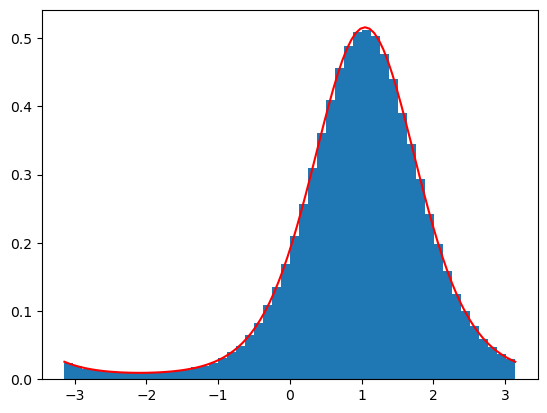

In [ ]:
kappa=2
mu=np.pi/3
nsamples=1000000
vonrvs=np.zeros(nsamples)
reals=15
for j in range(nsamples):
    x0=np.random.uniform(low=-np.pi,high=np.pi)
    f0=np.cos(x0-mu)
    for k in range(reals):
        x1=np.random.uniform(low=-np.pi,high=np.pi)
        f1=np.cos(x1-mu)
        if np.log(np.random.uniform())<kappa*(f1-f0):
            f0=f1
            x0=x1
    vonrvs[j]=x0
plt.hist(vonrvs,bins=50,density=True)
xvals=np.linspace(-np.pi,np.pi,100)
plt.plot(xvals,np.exp(kappa*np.cos(xvals-mu))/(2*np.pi*np.i0(kappa)),'r')
plt.show()